In [174]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
import pandas as pd
import seaborn as sns
import numpy as np
import gseapy as gp
import re
from sequencing_tools.viz_tools import okabeito_palette, color_encoder, simpsons_palette
from plotting_utils import label_sample
from sklearn.metrics.pairwise import cosine_similarity

def label_sample(x):
    if 'HS' in x:
        return 'High salt'
    elif 'Frag' in x:
        return 'Fragmented'
    elif re.search('N[aA]', x):
        return 'Alkaline hydrolysis'
    elif re.search('L[12]',x):
        return 'PolyA-selected'
    elif re.search('Exo|ED|DE', x):
        return 'Exonuclease I'
    elif 'All' in x:
        return 'Untreated'
    else:
        return 'Unfragmented'

plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize =15)
plt.rc('ytick', labelsize = 15)
colors = okabeito_palette()
colors.append('black')

In [59]:
project_path = '/stor/work/Lambowitz/cdw2854/cell_Free_nucleotides/tgirt_map'
count_file = project_path + '/Counts/combined_gene_count.tsv'
#    .assign(grouped_type = lambda d: np.where(d.name.str.startswith('MT-'), 'MT', d.grouped_type))\


count_df = pd.read_table(count_file) \
    .assign(grouped_type = lambda d: np.where(d.grouped_type == "rDNA", 'rRNA', d.grouped_type))
count_df.head()

,id,grouped_type,type,name,IGG_cf_R1_001,QCF1_R1_001,QCF2_R1_001,Qcf10_R1_001,Qcf4_R1_001,Qcf5_R1_001,...,Qcf_Frag2_R1_001,Qcf_HS1_R1_001,Qcf_HS2_R1_001,Qcf_HS3_R1_001,Qcf_L1_R1_001,Qcf_L2_R1_001,Qcf_NA2_R1_001,Qcf_Na1_R1_001,S96_cfD_R1_001,S96_cf_R1_001
0,18S_rRNA,rRNA,rDNA,18S_rRNA,900.5,87760,135395.5,36359.5,121554.0,79213.5,...,452256.5,12571.0,28811.0,39625.0,1149.5,826.0,1023.5,1013.5,52462.0,56256.5
1,28S_rRNA,rRNA,rDNA,28S_rRNA,1385.5,192404,272497.5,76302.0,305133.0,199976.5,...,682786.5,22432.0,59323.0,84889.0,7030.0,9547.5,1983.5,2174.5,138076.0,147620.0
2,5.8S_rRNA,rRNA,rDNA,5.8S_rRNA,217.5,83417,76761.0,48814.5,254594.5,192064.0,...,48682.0,15559.0,35226.5,55166.5,192.0,96.0,121.5,159.5,181092.5,193161.0
3,5S_rRNA,rRNA,rDNA,5S_rRNA,4.0,112836,123751.0,36413.5,103664.5,72364.0,...,39846.0,939.5,4702.0,7247.5,133.5,37.5,57.5,85.0,1675.5,1770.5
4,ENSG00000000003.14_2,Protein coding,protein_coding,TSPAN6,0.0,0,0.0,0.0,0.0,1.0,...,9.0,0.0,0.0,0.0,3.0,1.0,8.0,15.0,0.0,0.0


In [62]:
count_df\
    .filter(regex='type|name|id|L[12]')\
    .sort_values('Qcf_L1_R1_001', ascending=False)\
    .query('type!="protein_coding"')

,id,grouped_type,type,name,Qcf_L1_R1_001,Qcf_L2_R1_001
1,28S_rRNA,rRNA,rDNA,28S_rRNA,7030.0,9547.5
30178,ENSG00000230021.9_4,Other ncRNA,transcribed_processed_pseudogene,RP11-206L10.17,6145.0,10044.0
16589,ENSG00000187653.11_3,Other ncRNA,processed_pseudogene,AC019188.1,3212.0,5217.0
60116,MT-TH,tRNA,tRNA,MT-TH,2596.0,981.0
60129,MT-TV,tRNA,tRNA,MT-TV,2444.0,932.0
60044,ENSG00000285280.1_1,Other ncRNA,lincRNA,RP11-139E24.1,2148.0,1153.0
27101,ENSG00000225630.1_3,Other ncRNA,unprocessed_pseudogene,RP5-857K21.8,1685.0,2591.0
39682,ENSG00000248527.1_3,Other ncRNA,unprocessed_pseudogene,RP5-857K21.10,1652.0,2637.0
60125,MT-TR,tRNA,tRNA,MT-TR,1549.0,575.0
60121,MT-TM,tRNA,tRNA,MT-TM,1263.0,451.0


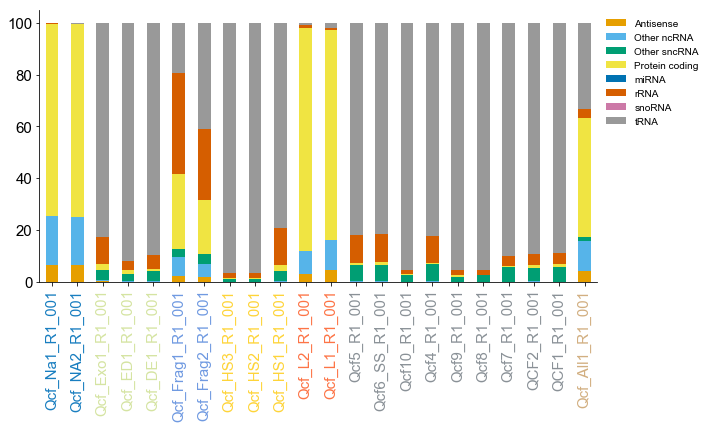

In [4]:
def percentage_columns(d):
    for col in d.columns:
        d[col] = d[col].transform(lambda x: 100*x/x.sum())
    return d

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
bar_df = count_df.drop(['id','type','name'], axis=1)\
    .filter(regex = 'grouped|Q[cC][fF]')\
    .groupby('grouped_type')\
    .sum() \
    .pipe(percentage_columns)\
    .transpose() \
    .assign(treatment = lambda d: d.index.map(label_sample))
    
bar_df.sort_values('treatment')\
    .drop('treatment', axis=1)\
    .plot.bar(stacked=True, ax = ax, color = colors)
ax.legend(bbox_to_anchor = (1,1), frameon = False)

ce = color_encoder()
ce.fit_transform(bar_df.treatment, simpsons_palette())
for xt in ax.get_xmajorticklabels():
    color = ce.encoder[label_sample(xt.get_text())]
    xt.set_color(color)
sns.despine()

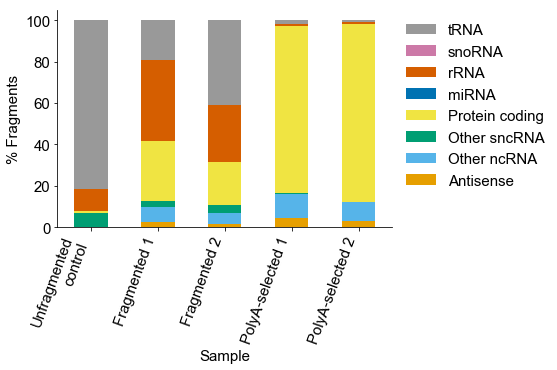

In [5]:
def rename_longRNA(name):
    try:
        x = name.split('_')[1]
        treatment = ''
    
        is_long = 0
        if 'Frag' in x:
            treatment = 'Fragmented'
            is_long = 1
        elif re.search('L[12]', x):
            treatment = 'PolyA-selected'
            is_long = 1
        elif re.search('Qcf[0-9]+|SS',name):
            treatment = 'Unfragmented\ncontrol'
            is_long = 0
    
        if is_long == 1:
            return treatment +' ' + re.search('\d+', x).group(0)
        else:
            return treatment 
    except IndexError:
        return name
        

fig = plt.figure()
ax = fig.add_subplot(111)
count_df\
    .filter(regex = 'grouped|L[12]|Frag|SS')\
    .groupby('grouped_type')\
    .sum() \
    .pipe(percentage_columns)\
    .rename(columns = rename_longRNA)\
    .transpose() \
    .plot.bar(stacked=True, ax = ax, color = colors)
ax.legend(bbox_to_anchor = (1,1),  fontsize=15)
ax.set_xlabel('Sample')
ax.set_ylabel('% Fragments')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, ha = 'right')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], frameon = False, bbox_to_anchor = (1,1), fontsize = 15)
sns.despine()

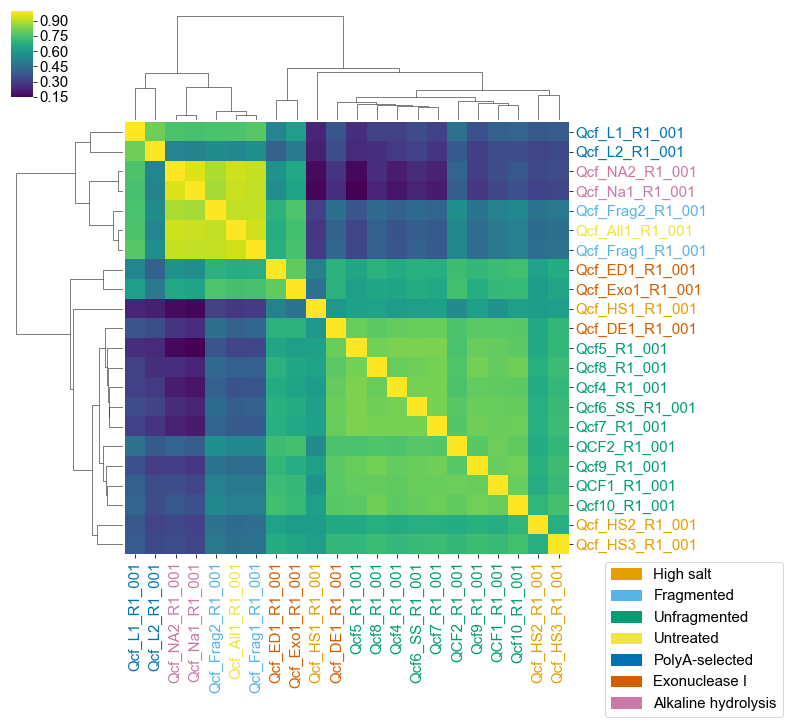

In [6]:
cor_df = np.log(count_df.filter(regex = 'Qcf|QCF')+1).corr()
p = sns.clustermap(cor_df, cmap = 'viridis')
ax = p.ax_heatmap
xt = ax.set_xticks(range(cor_df.shape[0]))
yt = ax.set_yticks(range(cor_df.shape[1]))
xt = ax.set_xticklabels(cor_df.columns[p.dendrogram_col.reordered_ind])
yt = ax.set_yticklabels(cor_df.index[p.dendrogram_row.reordered_ind])

yt = ax.set_yticks(np.arange(cor_df.shape[1])+0.5)
xt = ax.set_xticks(np.arange(cor_df.shape[0])+0.5)

ce = color_encoder()
ce.fit(cor_df.columns.map(label_sample), 
                 okabeito_palette())
for xt in ax.get_xmajorticklabels():
    color = ce.encoder[label_sample(xt.get_text())]
    xt.set_color(color)
    
for yt in ax.get_ymajorticklabels():
    color = ce.encoder[label_sample(yt.get_text())]
    yt.set_color(color)

pat = [mpatches.Patch(color=col, label=lab) for lab, col in ce.encoder.items()]
ax.legend(handles=pat, bbox_to_anchor = (1.5,0.), fontsize=15)

In [101]:
def count_to_tpm(count, length):
    rate = count/length
    tpm = rate/rate.sum() * 1e6 
    return tpm

gene_length = pd.read_table('/stor/work/Lambowitz/ref/hg19/genome/genes.length', 
                            names = ['id','glength'])
gene_length.head()

tpm_df = count_df\
    .filter(regex='id|grouped_type|type|name|L[12]|Frag|FQ') \
    .query('grouped_type == "Protein coding"')\
    .assign(id = lambda d: d.id.str.split('.', expand=True).iloc[:,0])\
    .merge(gene_length)
for col in tpm_df.columns:
    if 'Qcf' in col:
        tpm_df[col] = count_to_tpm(tpm_df[col], tpm_df['glength'])

In [102]:
gene_expr = '/stor/work/Lambowitz/cdw2854/EV_polyA/published_expr/rna_tissue.tsv'
expr_df = pd.read_table(gene_expr)
expr_df.head()

,Gene,Gene name,Sample,Value,Unit
0,ENSG00000000003,TSPAN6,adipose tissue,31.5,TPM
1,ENSG00000000003,TSPAN6,adrenal gland,26.4,TPM
2,ENSG00000000003,TSPAN6,appendix,9.2,TPM
3,ENSG00000000003,TSPAN6,bone marrow,0.7,TPM
4,ENSG00000000003,TSPAN6,breast,53.4,TPM


In [103]:
top_n = 80
tpm_cor_df = tpm_df\
    .filter(regex='id|Qcf')\
    .rename(columns = {'id':'Gene'})
cor_df = expr_df\
    .pipe(pd.pivot_table, columns = 'Sample', 
          index=['Gene'], values='Value') \
    .reset_index() \
    .merge(tpm_cor_df, on ='Gene', how ='inner')\
    .sort_values('Qcf_L1_R1_001', ascending=False)\
    .iloc[:, 1:]\
    .transform(lambda x: np.log(x+1))\
    .corr(method = 'pearson')\
    .filter(regex = 'Qcf|Frag') \
    .reset_index() \
    .pipe(lambda d: d[~d['index'].str.contains('Qcf')])\
    .sort_values('Qcf_L1_R1_001', ascending=False)\
    .head(top_n)
cor_df.index = cor_df['index']
cor_df

,index,Qcf_Frag1_R1_001,Qcf_Frag2_R1_001,Qcf_L1_R1_001,Qcf_L2_R1_001
index,,,,,
bone marrow,bone marrow,0.137078,0.161811,0.542006,0.547677
lymph node,lymph node,0.118489,0.149544,0.497545,0.493678
spleen,spleen,0.132440,0.160417,0.495124,0.492055
appendix,appendix,0.129804,0.162701,0.489941,0.487761
tonsil,tonsil,0.107950,0.142699,0.485724,0.479622
salivary gland,salivary gland,0.149433,0.165192,0.466157,0.480842
colon,colon,0.125736,0.156184,0.464467,0.469736
adipose tissue,adipose tissue,0.132018,0.160747,0.464452,0.462404
urinary bladder,urinary bladder,0.118250,0.153298,0.461637,0.455762


Text(1,0.6,"Spearman's $\\rho$")

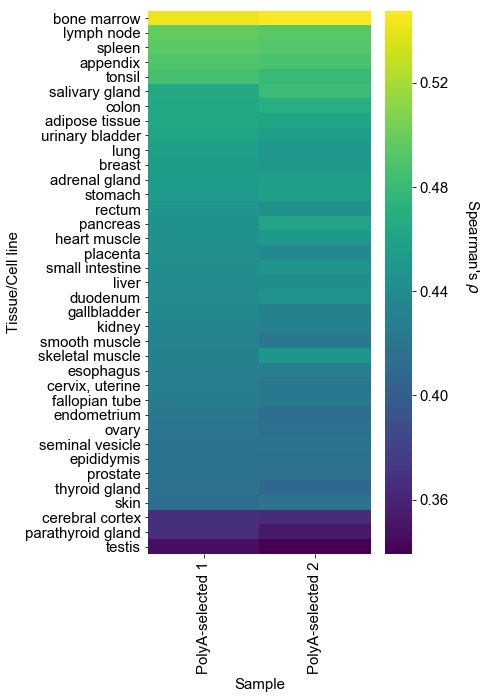

In [104]:
fig = plt.figure(figsize = (5,10))
ax = fig.add_subplot(111)
sns.heatmap(cor_df.filter(regex = 'L[12]').rename(columns = rename_longRNA),
           cmap = 'viridis', ax = ax)
ax.set_xlabel('Sample')
ax.set_ylabel('Tissue/Cell line')
yt = ax.set_yticks(np.arange(cor_df.shape[0])+0.5)
yt = ax.set_yticklabels(cor_df['index'].values, fontsize=15)
fig.text(1,0.6, r"Spearman's $\rho$", rotation = 270, fontsize=15)

Text(47,0.5,'Tissue/Cell line')

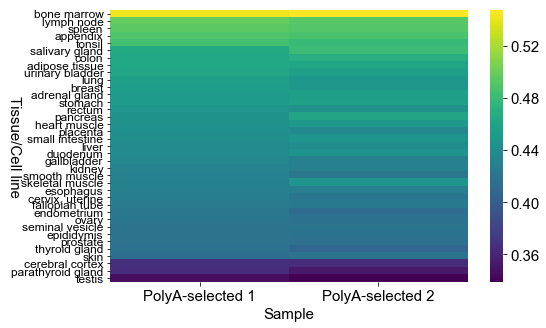

In [105]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
sns.heatmap(cor_df.filter(regex = 'L[12]').rename(columns = rename_longRNA),
               cmap = 'viridis', ax = ax)
yt = ax.set_yticks(np.arange(cor_df.shape[0])+0.5)
yt = ax.set_yticklabels(cor_df['index'].values, fontsize=12)#[p.dendrogram_row.reordered_ind])
ax.set_xlabel('Sample')
ax.set_ylabel('Tissue/Cell line', rotation=270)
#fig.text(0.08,0.85, r"Spearman's $\rho$", rotation = 90, fontsize=15)

In [106]:
tpm_df.head()

,id,grouped_type,type,name,Qcf_Frag1_R1_001,Qcf_Frag2_R1_001,Qcf_L1_R1_001,Qcf_L2_R1_001,glength
0,ENSG00000000003,Protein coding,protein_coding,TSPAN6,25.690156,18.542574,1.109379,0.229523,11321
1,ENSG00000000005,Protein coding,protein_coding,TNMD,10.517738,15.464097,0.277559,0.344551,15083
2,ENSG00000000419,Protein coding,protein_coding,DPM1,13.394043,6.892582,6.362350,1.755104,23688
3,ENSG00000000457,Protein coding,protein_coding,SCYL3,14.216242,10.450980,1.125484,0.232855,44636
4,ENSG00000000460,Protein coding,protein_coding,C1orf112,19.006012,12.271192,5.844284,0.703830,191976


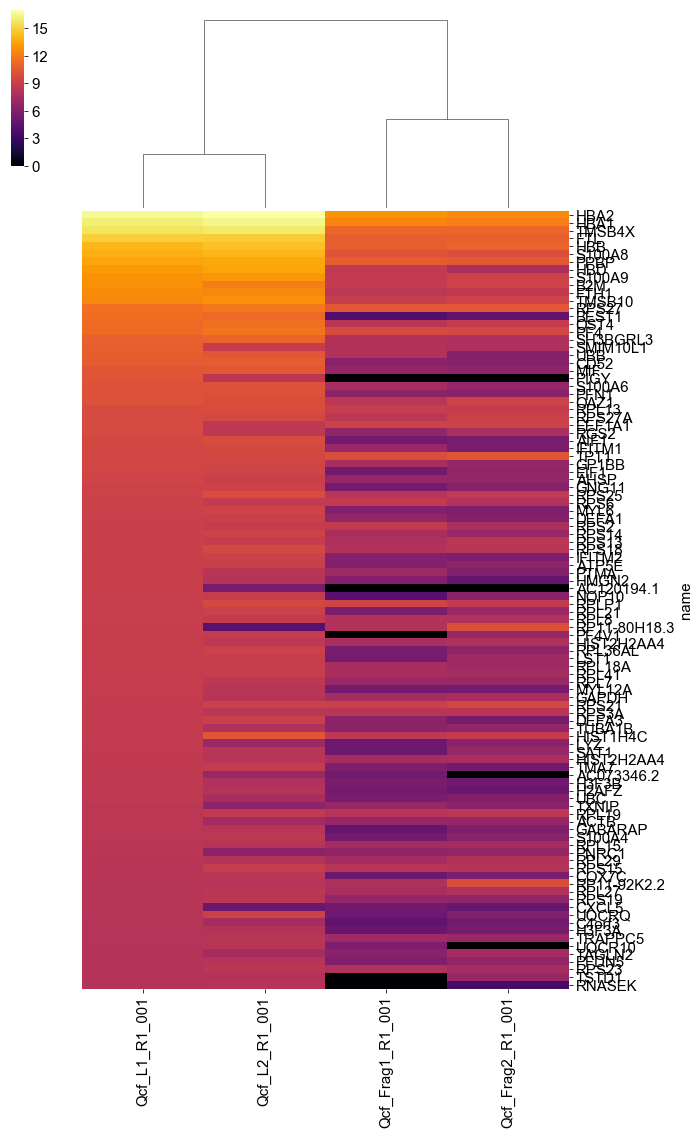

In [107]:
top_n = 100
hd = tpm_df\
    .sort_values('Qcf_L1_R1_001', ascending=False)\
    .query('type == "protein_coding"')\
    .pipe(lambda d: d[~d.name.str.contains('^MT')])
hd.index = hd.name

p = sns.clustermap(np.log2(hd\
                           .head(top_n)\
                           .filter(regex = 'Q')+1),
              row_cluster=False,
              cmap='inferno',
              figsize = (10,18))
ax = p.ax_heatmap
yt = ax.set_yticks(np.arange(top_n) +0.5)
yt = ax.set_yticklabels(hd.index[:top_n])

In [108]:
samplename = 'Qcf_L1_R1_001'

tpm_df = count_df\
    .assign(id = lambda d: d.id.str.split('.', expand=True).iloc[:,0])\
    .filter(regex='id|grouped_type|type|name|L[12]|Frag|FQ') \
    .merge(gene_length) \
    .query('type == "protein_coding"')
for col in tpm_df.columns:
    if 'Qcf' in col:
        tpm_df[col] = count_to_tpm(tpm_df[col], tpm_df['glength'])
tpm_df.sort_values('Qcf_L1_R1_001', ascending=False).head()


rank_df = expr_df\
    .pipe(lambda d: d[np.in1d(d.Sample, ['bone marrow', 'lymph node', 'spleen'])])\
    .rename(columns = {'Gene':'id',
                       'Gene name':'name'})\
    .groupby(['id','name'], as_index=False)\
    .agg({'Value':'mean'})\
    .filter(['id','name','Value'])\
    .merge(hd\
            .loc[:,['id','name',samplename]],
          on = ['id','name']) \
    .assign(rank = lambda d: d[samplename].rank() - d['Value'].rank()) \
    .sort_values('rank', ascending=False)
rank_df.head(20)

/stor/work/Lambowitz/cdw2854/src/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'name' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


,id,name,Value,Qcf_L1_R1_001,rank
18378,ENSG00000255072,PIGY,0.0,1259.804139,17655.5
18692,ENSG00000267697,LUZP6,0.0,166.505582,17516.5
5791,ENSG00000127530,OR7C1,0.0,62.894664,17275.5
17227,ENSG00000206106,KRTAP22-2,0.0,57.348302,17241.5
14249,ENSG00000180934,OR56A1,0.0,50.863120,17194.5
8896,ENSG00000148826,NKX6-2,0.0,49.877991,17186.5
12501,ENSG00000170790,OR10A2,0.0,47.753909,17166.5
18376,ENSG00000255012,OR5M1,0.0,39.786520,17107.5
18569,ENSG00000260836,RP11-152F13.10,0.0,37.653873,17078.5
17602,ENSG00000221836,OR2A5,0.0,33.094277,17013.0


In [109]:
cor_df = expr_df\
    .pipe(pd.pivot_table, columns = 'Sample', 
          index=['Gene', 'Gene name'], values='Value') \
    .reset_index() \
    .pipe(lambda d: d[~d['Gene name'].str.contains('^MT')])\
    .merge(tpm_cor_df.rename(columns=rename_longRNA), on ='Gene', how ='inner') \
    .sort_values('PolyA-selected 1', ascending=False)
cor_df.index= cor_df['Gene name']
cor_df.head(10)

,Gene,Gene name,adipose tissue,adrenal gland,appendix,bone marrow,breast,cerebral cortex,"cervix, uterine",colon,...,spleen,stomach,testis,thyroid gland,tonsil,urinary bladder,Fragmented 1,Fragmented 2,PolyA-selected 1,PolyA-selected 2
Gene name,,,,,,,,,,,,,,,,,,,,,
HBA2,ENSG00000188536,HBA2,226.0,336.7,218.0,18369.0,213.0,59.0,73.2,78.2,...,427.2,32.4,13.3,55.4,8.2,28.5,8026.927527,6324.371397,104296.825453,127353.270484
HBA1,ENSG00000206172,HBA1,142.9,233.6,143.1,17119.3,110.9,48.3,34.8,58.1,...,303.5,20.4,9.4,35.4,3.9,17.1,5401.012739,4570.715152,70786.398891,91679.588751
TMSB4X,ENSG00000205542,TMSB4X,3805.9,5439.9,6688.8,5468.2,3675.2,2891.0,4421.5,4173.9,...,10744.7,4224.3,928.3,1529.5,6487.7,5915.7,2445.591751,2311.535897,55004.383216,61391.171634
FTL,ENSG00000087086,FTL,4755.5,2291.2,3208.8,2600.5,2719.6,1997.8,2925.6,2081.9,...,5838.2,1280.3,889.4,2427.0,1209.1,3753.2,1743.654730,1907.964637,33310.890454,29864.665493
HBB,ENSG00000244734,HBB,627.5,654.3,306.3,78046.6,854.1,85.0,283.8,266.8,...,720.7,48.9,30.1,456.2,37.1,180.5,1762.207697,2064.849982,18004.507512,23130.075727
S100A8,ENSG00000143546,S100A8,464.5,22.0,1232.5,14915.7,36.9,11.7,176.7,25.4,...,786.1,10.9,13.0,12.6,4867.3,166.9,1257.950933,1049.198869,14931.344862,18404.809756
PPBP,ENSG00000163736,PPBP,2.3,1.4,1.6,110.6,1.1,0.5,0.1,0.2,...,24.3,0.1,0.0,1.6,0.0,0.7,1665.322196,1489.225925,12588.175006,12844.189933
HBD,ENSG00000223609,HBD,0.1,0.3,0.7,1221.3,0.0,0.0,0.0,0.4,...,2.2,0.2,0.1,0.1,0.1,0.1,422.330305,216.609379,9078.883863,12191.008323
S100A9,ENSG00000163220,S100A9,794.0,53.5,2087.4,20959.3,51.3,20.9,255.9,42.7,...,1188.6,17.2,16.6,29.3,3911.6,1006.1,449.968937,632.179900,7689.407847,8777.180172


In [177]:
top_n = 50
p = sns.heatmap(np.log2(cor_df.sort_values('Fragmented 1', ascending=False).iloc[:top_n,-4:]+1),
                  cmap = 'viridis')
yt = ax.set_yticks(np.arange(top_n)+0.5)
xt = ax.set_xticks(np.arange(4) + 0.5)
xt = ax.set_xticklabels(cor_df.columns[-4:].str.capitalize()[p.dendrogram_col.reordered_ind])
yt = ax.set_yticklabels(cor_df.index[:top_n], fontsize=9)
ax.set_ylabel('Gene', rotation = 270)
p.fig.text(0.1,0.85, r'TPM ($log_2$)', rotation = 90, fontsize=15)

KeyError: 'Fragmented 1'

Text(0.1,0.85,'TPM ($log_2$)')

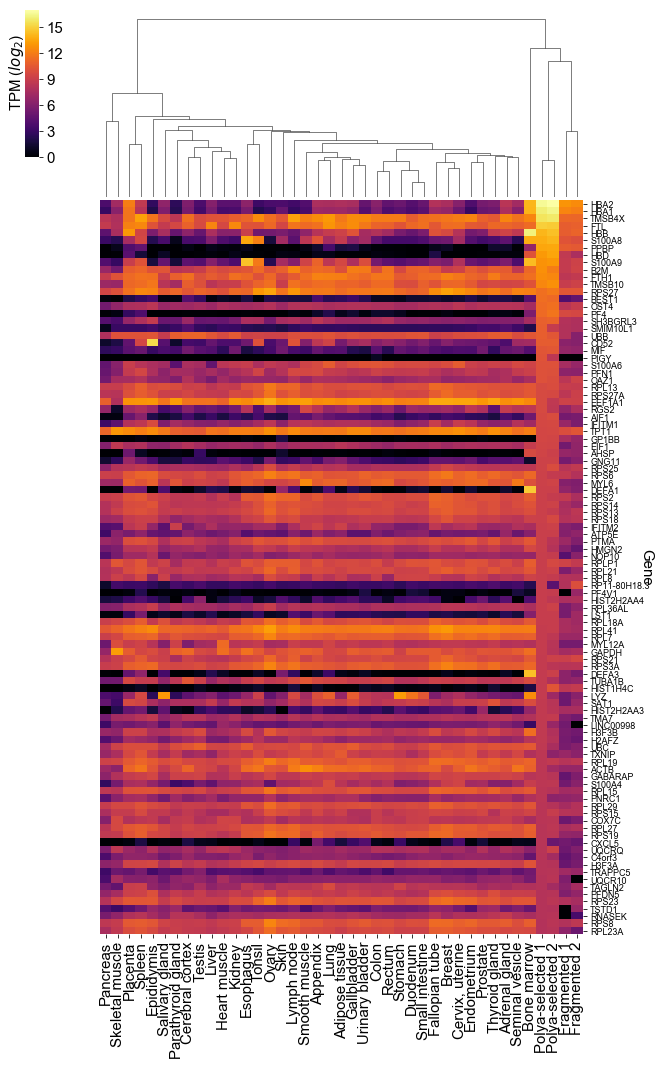

In [111]:
top_n = 100
p = sns.clustermap(np.log2(cor_df.iloc[:top_n,2:]+1),
                   row_cluster=False,
                  figsize = (10,17),
                  cmap = 'inferno')
ax = p.ax_heatmap
xt = ax.set_yticks(np.arange(top_n)+0.5)
yt = ax.set_xticks(np.arange(cor_df.shape[1] - 2) + 0.5)
xt = ax.set_xticklabels(cor_df.columns[2:].str.capitalize()[p.dendrogram_col.reordered_ind])
yt = ax.set_yticklabels(cor_df.index[:top_n], fontsize=9)
ax.set_ylabel('Gene', rotation = 270)
p.fig.text(0.1,0.85, r'TPM ($log_2$)', rotation = 90, fontsize=15)

In [112]:
cor_df

,Gene,Gene name,adipose tissue,adrenal gland,appendix,bone marrow,breast,cerebral cortex,"cervix, uterine",colon,...,spleen,stomach,testis,thyroid gland,tonsil,urinary bladder,Fragmented 1,Fragmented 2,PolyA-selected 1,PolyA-selected 2
Gene name,,,,,,,,,,,,,,,,,,,,,
HBA2,ENSG00000188536,HBA2,226.0,336.7,218.0,18369.0,213.0,59.0,73.2,78.2,...,427.2,32.4,13.3,55.4,8.2,28.5,8026.927527,6324.371397,104296.825453,127353.270484
HBA1,ENSG00000206172,HBA1,142.9,233.6,143.1,17119.3,110.9,48.3,34.8,58.1,...,303.5,20.4,9.4,35.4,3.9,17.1,5401.012739,4570.715152,70786.398891,91679.588751
TMSB4X,ENSG00000205542,TMSB4X,3805.9,5439.9,6688.8,5468.2,3675.2,2891.0,4421.5,4173.9,...,10744.7,4224.3,928.3,1529.5,6487.7,5915.7,2445.591751,2311.535897,55004.383216,61391.171634
FTL,ENSG00000087086,FTL,4755.5,2291.2,3208.8,2600.5,2719.6,1997.8,2925.6,2081.9,...,5838.2,1280.3,889.4,2427.0,1209.1,3753.2,1743.654730,1907.964637,33310.890454,29864.665493
HBB,ENSG00000244734,HBB,627.5,654.3,306.3,78046.6,854.1,85.0,283.8,266.8,...,720.7,48.9,30.1,456.2,37.1,180.5,1762.207697,2064.849982,18004.507512,23130.075727
S100A8,ENSG00000143546,S100A8,464.5,22.0,1232.5,14915.7,36.9,11.7,176.7,25.4,...,786.1,10.9,13.0,12.6,4867.3,166.9,1257.950933,1049.198869,14931.344862,18404.809756
PPBP,ENSG00000163736,PPBP,2.3,1.4,1.6,110.6,1.1,0.5,0.1,0.2,...,24.3,0.1,0.0,1.6,0.0,0.7,1665.322196,1489.225925,12588.175006,12844.189933
HBD,ENSG00000223609,HBD,0.1,0.3,0.7,1221.3,0.0,0.0,0.0,0.4,...,2.2,0.2,0.1,0.1,0.1,0.1,422.330305,216.609379,9078.883863,12191.008323
S100A9,ENSG00000163220,S100A9,794.0,53.5,2087.4,20959.3,51.3,20.9,255.9,42.7,...,1188.6,17.2,16.6,29.3,3911.6,1006.1,449.968937,632.179900,7689.407847,8777.180172


In [113]:
tpm_df.head()

,id,grouped_type,type,name,Qcf_Frag1_R1_001,Qcf_Frag2_R1_001,Qcf_L1_R1_001,Qcf_L2_R1_001,glength
3,ENSG00000000003,Protein coding,protein_coding,TSPAN6,26.444522,18.894833,1.113447,0.230170,11321
4,ENSG00000000005,Protein coding,protein_coding,TNMD,10.826582,15.757873,0.278577,0.345522,15083
5,ENSG00000000419,Protein coding,protein_coding,DPM1,13.787346,7.023523,6.385679,1.760048,23688
6,ENSG00000000457,Protein coding,protein_coding,SCYL3,14.633689,10.649521,1.129611,0.233511,44636
7,ENSG00000000460,Protein coding,protein_coding,C1orf112,19.564105,12.504311,5.865714,0.705812,191976


Text(0.9,0.5,'TPM ($log_2$)')

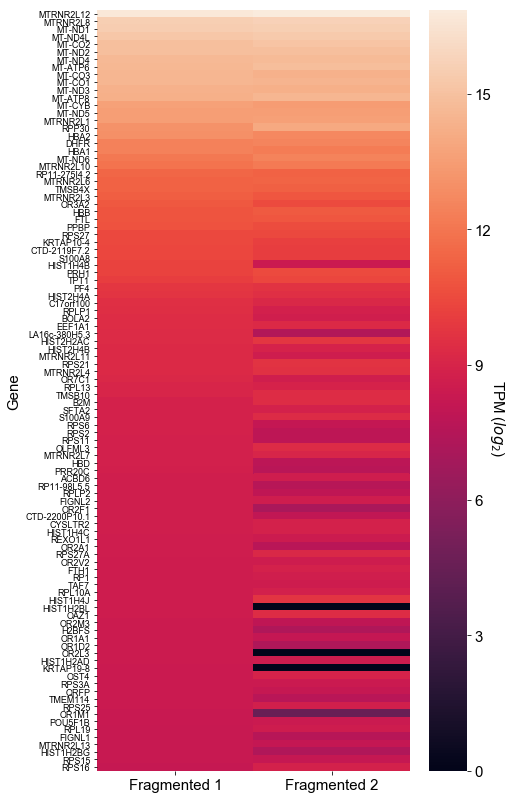

In [114]:
fig = plt.figure(figsize=(7,14))
ax = plt.subplot(111)
frag_df = tpm_df\
    .filter(regex='id|name|type|Frag')\
    .sort_values('Qcf_Frag1_R1_001', ascending=False)\
    .set_index('name')
p = sns.heatmap(np.log2(frag_df.iloc[:top_n,-2:]+1), ax =ax)
xt = ax.set_yticks(np.arange(top_n)+0.5)
yt = ax.set_xticks(np.arange(2) + 0.5)
xt = ax.set_xticklabels(frag_df.columns[-2:].map(rename_longRNA))
yt = ax.set_yticklabels(frag_df.index[:top_n], fontsize=9)
ax.set_ylabel('Gene', rotation = 90)
fig.text(0.9,0.5, r'TPM ($log_2$)', rotation = 270, fontsize=15)

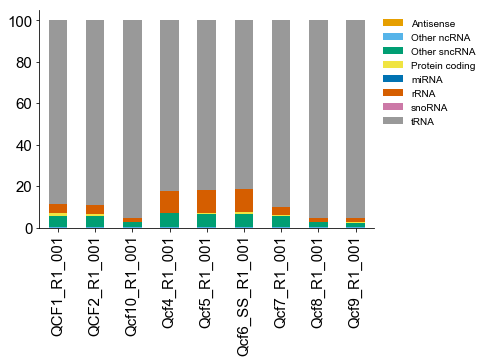

In [115]:
ax = plt.subplot(111)
count_df.filter(regex='grou|Q[cC][Ff][0-9]+')\
    .groupby('grouped_type')\
    .sum() \
    .pipe(percentage_columns)\
    .transpose() \
    .plot.bar(stacked=True, ax = ax, color = colors)
ax.legend(bbox_to_anchor = (1,1), frameon = False)
sns.despine()

In [171]:
dedup_df = pd.read_table('/stor/work/Lambowitz/cdw2854/cell_Free_nucleotides/tgirt_map/Counts/all_counts/spreaded_all_counts.tsv')
dedup_df.head()

,gene_id,gene_name,gene_type,grouped_type,IGG-cf_R1_001:all:antisense,IGG-cf_R1_001:all:sense,IGG-cf_R1_001:dedup:antisense,IGG-cf_R1_001:dedup:sense,QCF1_R1_001:all:antisense,QCF1_R1_001:all:sense,...,Qcf_Na1_R1_001:dedup:antisense,Qcf_Na1_R1_001:dedup:sense,S96-cfD_R1_001:all:antisense,S96-cfD_R1_001:all:sense,S96-cfD_R1_001:dedup:antisense,S96-cfD_R1_001:dedup:sense,S96-cf_R1_001:all:antisense,S96-cf_R1_001:all:sense,S96-cf_R1_001:dedup:antisense,S96-cf_R1_001:dedup:sense
0,.,.,No features,No features,0,0,0,0,1164939,69311,...,2179711,2160222,0,0,0,0,0,0,0,0
1,.,No features:.,Repeats,Repeats,3745,4542,2989,3742,35812,17223,...,1377767,1382561,146014,142047,94446,92684,159513,155574,101781,100419
2,18S_rRNA,18S_rRNA,rDNA,rRNA,0,0,0,0,734,175520,...,1357,1863,0,0,0,0,0,0,0,0
3,28S_rRNA,28S_rRNA,rDNA,rRNA,0,0,0,0,1089,384807,...,2872,3980,0,0,0,0,0,0,0,0
4,5.8S_rRNA,5.8S_rRNA,rDNA,rRNA,0,0,0,0,56,166834,...,212,293,0,0,0,0,0,0,0,0


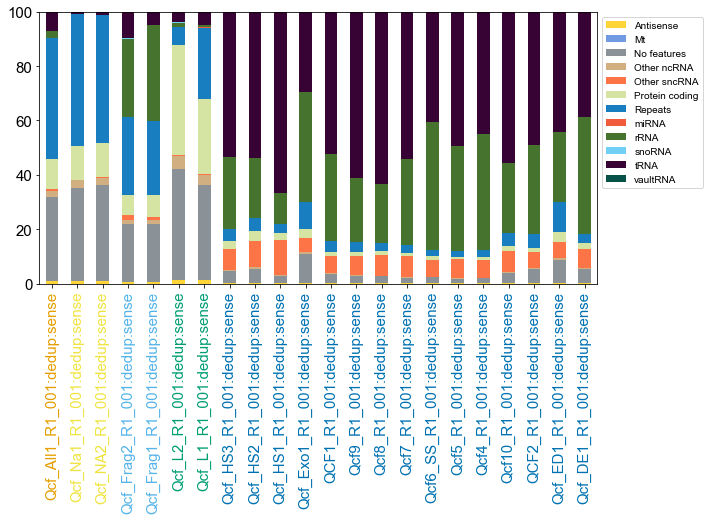

In [173]:
from tgirt_map.table_tool import change_gene_type
from sequencing_tools.viz_tools import color_encoder, simpsons_palette

def label_treatment(x, return_label=False):
    if 'All' in x:
        return 'Total nucleic acid' if return_label else 1
    elif re.search('NA|Na', x):
        return 'Alkaline hydrolysis' if return_label else 2
    elif re.search('Frag|frag', x):
        return 'Fragmented' if return_label else 3
    elif re.search('L[12]', x):
        return 'PolyA-selected' if return_label else 4
    else:
        return 'DNase-treatment' if return_label else 5

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
colors.append('salmon')
subset_dedup_df = dedup_df\
    .assign(gene_type = lambda d: d.gene_type.map(change_gene_type))\
    .filter(regex = 'type|Qcf|QCF')\
    .assign(grouped_type = lambda d: np.where(d.grouped_type == "rDNA", 'rRNA', d.grouped_type))\
    .groupby('grouped_type')\
    .sum() \
    .pipe(lambda d: d[d.columns[~d.columns.str.contains('anti')]])\
    .pipe(lambda d: d[d.columns[d.columns.str.contains('dedup')]])\
    .pipe(percentage_columns)\

subset_dedup_df\
    .transpose() \
    .assign(prep = lambda d: d.index.map(label_treatment))\
    .sort_values('prep')\
    .drop('prep', axis=1)\
    .plot.bar(stacked=True, ax = ax, color = colors)
ax.legend(bbox_to_anchor = (1,1))

preps = [label_treatment(_.get_text(), return_label=True) for _ in ax.get_xmajorticklabels()]
ce = color_encoder()
ce.fit(preps)
for _, pre in zip(ax.get_xmajorticklabels(),preps):
    _.set_color(ce.encoder[pre])

In [118]:
dedup_df\
    .filter(regex='gene|HS.*dedup.*sense')\
    .sort_values('Qcf_HS1_R1_001:dedup:sense',ascending=False)\
    .pipe(lambda d: d[d.gene_type.str.contains('protein')])

,gene_id,gene_name,gene_type,Qcf_HS1_R1_001:dedup:antisense,Qcf_HS1_R1_001:dedup:sense,Qcf_HS2_R1_001:dedup:antisense,Qcf_HS2_R1_001:dedup:sense,Qcf_HS3_R1_001:dedup:antisense,Qcf_HS3_R1_001:dedup:sense
29253,ENSG00000228716.6_3,DHFR,protein_coding,0,689,0,2493,2,2534
53201,ENSG00000269028.3_2,MTRNR2L12,protein_coding,0,640,2,2220,0,2181
45040,ENSG00000255823.4_3,MTRNR2L8,protein_coding,0,216,0,759,0,725
45401,ENSG00000256618.2_2,MTRNR2L1,protein_coding,0,131,0,416,0,330
18078,ENSG00000198763.3,MT-ND2,protein_coding,0,75,13,553,8,711
18149,ENSG00000198888.2,MT-ND1,protein_coding,0,62,8,406,5,567
54010,ENSG00000270672.1_2,MTRNR2L6,protein_coding,0,36,0,105,0,93
18147,ENSG00000198886.2,MT-ND4,protein_coding,5,34,26,184,39,318
9227,ENSG00000148688.13_2,RPP30,protein_coding,0,29,0,67,0,69
53735,ENSG00000270188.1_2,MTRNR2L11,protein_coding,0,27,0,42,0,55


In [119]:
subset_dedup_df\
    .reset_index()\
    .query('grouped_type == "Protein coding"')\
    .drop('grouped_type', axis=1)\
    .pipe(pd.melt) \
    .assign(label = lambda d: d.variable.map(label_sample))\
    .groupby('label', as_index=False)\
    .agg({'value':['min','max']})

label      value           
                              min        max
0  Alkaline hydrolysis  12.333201  12.454948
1        Exonuclease I   2.263385   3.659106
2           Fragmented   7.377040   8.026018
3            High salt   2.508258   3.522140
4       PolyA-selected  27.412613  40.406809
5         Unfragmented   0.931086   1.907198
6            Untreated  10.819417  10.819417

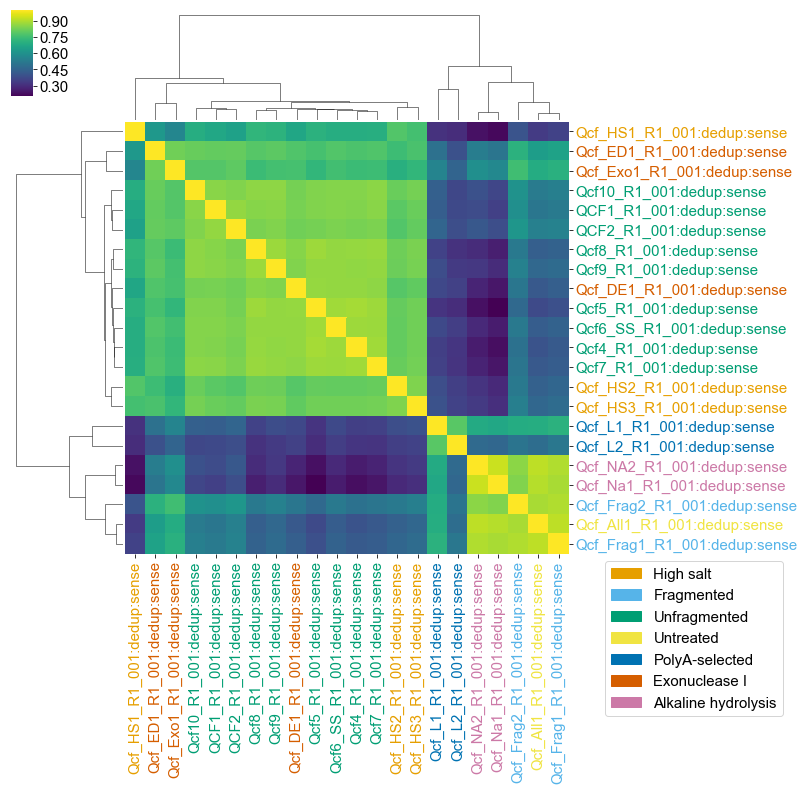

In [120]:
cor_df = np.log(dedup_df.filter(regex = 'Qcf|QCF').filter(regex='dedup:sense')+1).corr()
p = sns.clustermap(cor_df, cmap = 'viridis')
ax = p.ax_heatmap
xt = ax.set_xticks(range(cor_df.shape[0]))
yt = ax.set_yticks(range(cor_df.shape[1]))
xt = ax.set_xticklabels(cor_df.columns[p.dendrogram_col.reordered_ind])
yt = ax.set_yticklabels(cor_df.index[p.dendrogram_row.reordered_ind])

yt = ax.set_yticks(np.arange(cor_df.shape[1])+0.5)
xt = ax.set_xticks(np.arange(cor_df.shape[0])+0.5)

ce = color_encoder()
ce.fit(cor_df.columns.map(label_sample), 
                 okabeito_palette())
for xt in ax.get_xmajorticklabels():
    color = ce.encoder[label_sample(xt.get_text())]
    xt.set_color(color)
    
for yt in ax.get_ymajorticklabels():
    color = ce.encoder[label_sample(yt.get_text())]
    yt.set_color(color)

pat = [mpatches.Patch(color=col, label=lab) for lab, col in ce.encoder.items()]
ax.legend(handles=pat, bbox_to_anchor = (1.5,0.), fontsize=15)

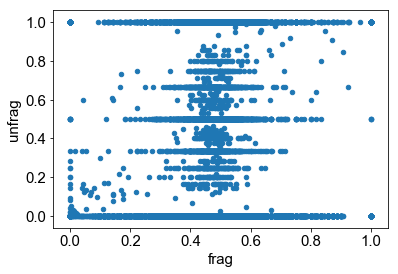

In [121]:
def frac(x, y):
    return x/(x+y)

sense_df = dedup_df\
    .filter(regex = 'Frag1.*dedup|QCF1_.*dedup|type|name|id')  \
    .assign(frag = lambda d: frac(d['Qcf_Frag1_R1_001:dedup:antisense'], d['Qcf_Frag1_R1_001:dedup:sense'])) \
    .assign(unfrag = lambda d: frac(d['QCF1_R1_001:dedup:antisense'],d['QCF1_R1_001:dedup:sense']))  \
    .query('grouped_type != "Repeats"') \
    .replace([np.inf, -np.inf], np.nan)\
    .fillna(0)
sense_df.plot.scatter('frag','unfrag')

In [122]:
sense_df.query('frag > unfrag').sort_values('frag', ascending=False).pipe(lambda d: d[d['QCF1_R1_001:dedup:antisense']>10])

,gene_id,gene_name,gene_type,grouped_type,QCF1_R1_001:dedup:antisense,QCF1_R1_001:dedup:sense,Qcf_Frag1_R1_001:dedup:antisense,Qcf_Frag1_R1_001:dedup:sense,frag,unfrag
12371,ENSG00000167995.15_2,BEST1,protein_coding,Protein coding,11,2,60,6,0.909091,0.846154
30156,ENSG00000230021.9_4,RP11-206L10.17,transcribed_processed_pseudogene,Other ncRNA,101,25,1160,232,0.833333,0.801587
3100,ENSG00000104904.12_4,OAZ1,protein_coding,Protein coding,225,126,188,42,0.817391,0.641026
55776,ENSG00000273734.1_5,LLfos-48D6.2,protein_coding,Protein coding,225,126,209,74,0.738516,0.641026
18056,ENSG00000198727.2,MT-CYB,protein_coding,Protein coding,13,39,235,504,0.317997,0.250000
18098,ENSG00000198804.2,MT-CO1,protein_coding,Protein coding,11,89,201,1210,0.142452,0.110000
4,5.8S_rRNA,5.8S_rRNA,rDNA,rRNA,35,12386,135,42997,0.003130,0.002818


In [123]:
count_df\
    .filter(regex='L[12]|Frag[12]|id|name') \
    .sort_values('Qcf_Frag1_R1_001', ascending=False)\
    .iloc[20:70,:]

,id,name,Qcf_Frag1_R1_001,Qcf_Frag2_R1_001,Qcf_L1_R1_001,Qcf_L2_R1_001
60113,MT-TE,MT-TE,11009.0,25895.0,395.0,161.0
60555,TRV-CAC10-1,TRV-CAC10-1,10439.0,81311.0,175.0,43.0
60308,TRG-GCC5-1,TRG-GCC5-1,9380.0,50633.0,200.0,32.0
60533,TRU-TCA1-1,TRU-TCA1-1,8684.0,52832.0,362.0,74.0
50909,ENSG00000265150.1,RN7SL2,8621.0,11731.0,20.0,22.0
59344,ENSG00000283029.1_4,RN7SL1,8111.0,10146.0,24.0,32.0
60123,MT-TP,MT-TP,7460.0,11543.0,184.0,62.0
60334,TRIMET-CAT2-1,TRIMET-CAT2-1,6165.0,43491.0,257.0,60.0
29271,ENSG00000228716.6_3,DHFR,5892.0,7312.0,1505.0,2648.0
60301,TRG-CCC8-1,TRG-CCC8-1,5649.0,36167.0,197.0,41.0


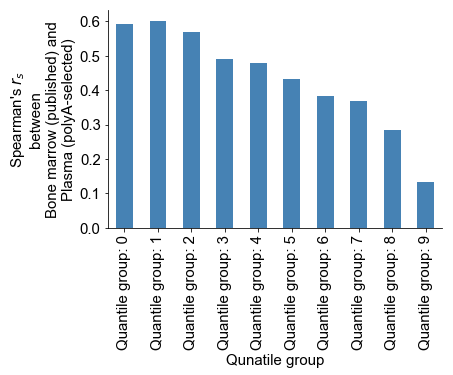

In [165]:
def cor_ntile(d):
    cor_coef = d.filter(regex = 'bone|Qc').corr(method='spearman')
    cor_coef = cor_coef.iloc[0,1]
    return pd.DataFrame({'ntile':[d.ntile.unique()[0]],
                         'cor':[cor_coef]})
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
qcut_expr_df = expr_df\
    .pipe(pd.pivot_table, columns = 'Sample', 
          index=['Gene'], values='Value') \
    .reset_index() \
    .merge(tpm_df.rename(columns = {'id':'Gene'}), on ='Gene', how ='inner') \
    .filter(regex = 'name|glength|Gene|L1|bone marrow') \
    .assign(ntile = lambda d: pd.qcut(d.glength, 10, labels=False))\
    .assign(ntile = lambda d: 'Quantile group: ' + d.ntile.astype(str))
    
qcut_expr_df.filter(regex = 'ntile|bone|Qc')\
    .groupby('ntile', as_index=False)\
    .apply(cor_ntile) \
    .plot.bar('ntile','cor', color = 'steelblue', ax = ax)
ax.legend().set_visible(False)
ax.set_xlabel('Qunatile group')
ax.set_ylabel(r"Spearman's $r_s$"\
              '\nbetween\nBone marrow (published) and\nPlasma (polyA-selected)')
sns.despine()

Text(0.5,1,'Quantile group: 9')

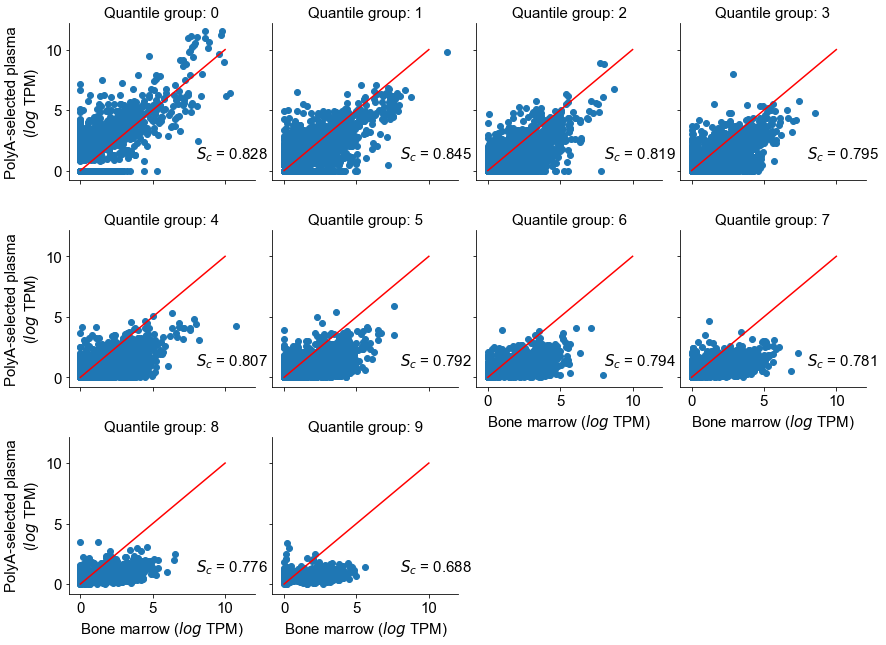

In [176]:
from scipy.stats import pearsonr

plot_qcut = qcut_expr_df\
                      .assign(plasma = lambda d: d['Qcf_L1_R1_001'].transform(lambda x: np.log(x+1)))\
                      .assign(bone = lambda d: d['bone marrow'].transform(lambda x: np.log(x+1)))\
                      .sort_values('ntile')
p = sns.FacetGrid(data = plot_qcut, 
                  col = 'ntile', col_wrap = 4)
p.map(plt.scatter, 'bone', 'plasma')
p.set_titles('{col_name}')
p.set_axis_labels('Bone marrow ($log$ TPM)', 'PolyA-selected plasma\n($log$ TPM)')

for ax in p.fig.axes:
    ax.plot([0,10],[0,10], color='red')
    
    data = plot_qcut.query("ntile == '%s'" %(ax.title.get_text()))
    cor_coef = cosine_similarity(data['plasma'].values.reshape(1,-1), 
                                       data['bone'].values.reshape(1,-1))
    ax.text(8, 1, r'$S_c$ = %.3f' %cor_coef, fontsize=15)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.title

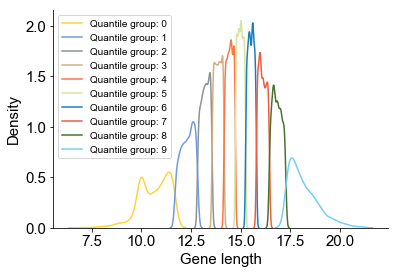

In [150]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = simpsons_palette()
for col, (gl, gl_df) in zip(colors, qcut_expr_df.groupby('ntile')):
    sns.distplot(np.log2(gl_df.glength), 
                 ax = ax, 
                 color = col,
                 label = gl,
                hist=False)
ax.set_xlabel('Gene length')
ax.set_ylabel('Density')
sns.despine()